# Assignment 2: Train and test your model on CIFAR10 dataset
Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

In [27]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from utils.data_processing import get_cifar10_data
from utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train = 45000,
    subset_val = 1000,
    subset_test = 10000,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset['x_train'].shape)
print("Training Set Label Shape: ", dataset['y_train'].shape)
print("Validation Set Data  Shape: ", dataset['x_val'].shape)
print("Validation Set Label Shape: ", dataset['y_val'].shape)
print("Test Set Data  Shape: ", dataset['x_test'].shape)
print("Test Set Label Shape: ", dataset['y_test'].shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (45000, 3072)
Training Set Label Shape:  (45000,)
Validation Set Data  Shape:  (1000, 3072)
Validation Set Label Shape:  (1000,)
Test Set Data  Shape:  (10000, 3072)
Test Set Label Shape:  (10000,)


In [29]:
x_train = dataset['x_train']
y_train = dataset['y_train']
x_val = dataset['x_val']
y_val = dataset['y_val']
x_test = dataset['x_test']
y_test = dataset['y_test']

In [30]:
# Import more utilies and the layers you have implemented
from layers.sequential import Sequential
from layers.linear import Linear
from layers.relu import ReLU
from layers.softmax import Softmax
from layers.loss_func import CrossEntropyLoss
from utils.optimizer import SGD
from utils.dataset import DataLoader
from utils.trainer import Trainer

## Visualize some examples from the dataset.

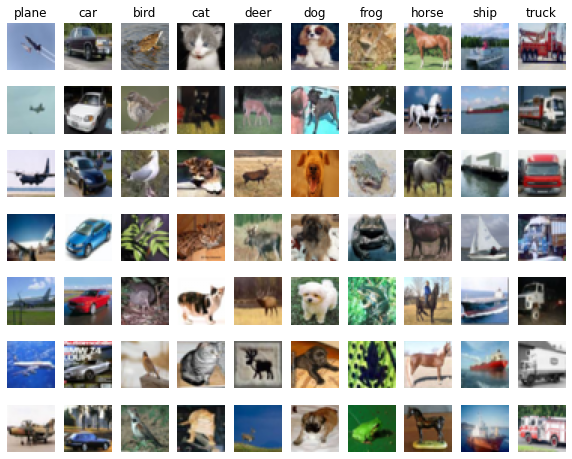

In [4]:
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7

def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(dataset[idx])
        plt.axis('off')
        if i == 0:
          plt.title(cls)
    plt.show()

visualize_data(x_train.reshape(45000, 3, 32, 32).transpose(0, 2, 3, 1), classes, samples_per_class)

## Initialize the model

In [5]:
input_size = 3072
hidden_size = 50 # Hidden layer size (Hyper-parameter)
num_classes = 10 # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    #np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.002, weight_decay=0.00025)
loss_func = CrossEntropyLoss()
epoch = 300 # (Hyper-parameter)
batch_size = 200 # (Reduce the batch size if your computer is unable to handle it)

In [7]:
#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3)

In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()

Epoch Average Loss: 2.302553
Validate Acc: 0.090
Epoch Average Loss: 2.302466
Epoch Average Loss: 2.302326
Epoch Average Loss: 2.302059
Validate Acc: 0.090
Epoch Average Loss: 2.301555
Epoch Average Loss: 2.300632
Epoch Average Loss: 2.299075
Validate Acc: 0.090
Epoch Average Loss: 2.296685
Epoch Average Loss: 2.293323
Epoch Average Loss: 2.288624
Validate Acc: 0.094
Epoch Average Loss: 2.282101
Epoch Average Loss: 2.273819
Epoch Average Loss: 2.264387
Validate Acc: 0.120
Epoch Average Loss: 2.254717
Epoch Average Loss: 2.245246
Epoch Average Loss: 2.236508
Validate Acc: 0.136
Epoch Average Loss: 2.228701
Epoch Average Loss: 2.221812
Epoch Average Loss: 2.215762
Validate Acc: 0.149
Epoch Average Loss: 2.210527
Epoch Average Loss: 2.205892
Epoch Average Loss: 2.201925
Validate Acc: 0.154
Epoch Average Loss: 2.198314
Epoch Average Loss: 2.195182
Epoch Average Loss: 2.192399
Validate Acc: 0.161
Epoch Average Loss: 2.189863
Epoch Average Loss: 2.187601
Epoch Average Loss: 2.185640
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from utils.evaluation import get_classification_accuracy
out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)

Training acc:  0.30195555555555553
Validation acc:  0.287


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

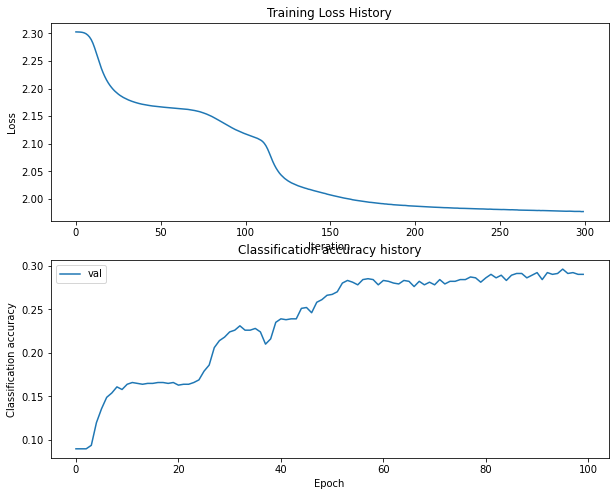

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

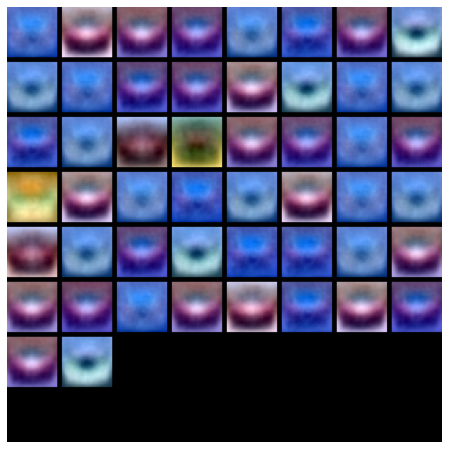

In [11]:
from utils.vis_utils import visualize_grid
# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network.

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer: }$ The best way to find the optimal hyper parameters is to perform grid search. Instead of using a built-in grid search model, I implemented the grid search from scartch using numpy and itertools. The idea behind my grid search approach is that first I tested all possible combinations of three different values for each of the four hyperparameters. For the three values I used the default values, a value above the default value and a value below the default value. Doing so allowed me to get a better sense of the network will respond as I increase, decrease or leave each hyperparameter value as it is, allowing me to get a better sense of weather I should increase or decrease the value of each hyperparameter. 

From my results below, it turned out that the largest value of hidden layer and epoch worked best and hence I knew I should focus on increase the values of both these parameters substantially. The best value of learning rate was the default so I felt that untouched while a slightly lower value of weight decay worked best. I then trained a new classifer making these adjustments to obtrain the best validation and test accuracy of over 48%.

In [40]:
all_hidden_size = [40,50,60]
all_epoch = [200,300,400]
all_lr = [0.002, 0.02, 0.2]
all_weight_decay = [0.000025,0.00025, 0.0025]

from itertools import product 

grid_search = list(product(all_hidden_size, all_epoch, all_lr, all_weight_decay))

x_size = len(grid_search)
y_size = 2

grid_accuracy = np.zeros([x_size, y_size])

In [7]:

def run_classifier(hidden_size, epoch, lr, weight_decay ):
    input_size = 3072
    # hidden_size = 50 # Hidden layer size (Hyper-parameter)
    num_classes = 10 # Output

    # For a default setting we use the same model we used for the toy dataset.
    # This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
    # A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
    def initialize_model():
        #np.random.seed(0) # No need to fix the seed here
        l1 = Linear(input_size, hidden_size)
        l2 = Linear(hidden_size, num_classes)
    
        r1 = ReLU()
        softmax = Softmax()
        return Sequential([l1, r1, l2, softmax])
    
    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = initialize_model()
    optim = SGD(net, lr, weight_decay)
    loss_func = CrossEntropyLoss()
    # epoch = 300 # (Hyper-parameter)
    batch_size = 200 # (Reduce the batch size if your computer is unable to handle it)

    #Initialize the trainer class by passing the above modules
    trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3)

    # Call the trainer function we have already implemented for you. This trains the model for the given
    # hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
    train_error, validation_accuracy = trainer.train()

    from utils.evaluation import get_classification_accuracy
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
    
    grid_accuracy[counter][0] = acc

    print("Training acc: ",acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)

    grid_accuracy[counter][1] = acc
    print("Validation acc: ",acc)

  


In [43]:
counter = 0 
for a,b,c,d in grid_search: 
    run_classifier(a,b,c,d)
    counter += 1 


0335
Epoch Average Loss: 1.622745
Validate Acc: 0.363
Epoch Average Loss: 1.644716
Epoch Average Loss: 1.660974
Epoch Average Loss: 1.605042
Validate Acc: 0.383
Epoch Average Loss: 1.637797
Epoch Average Loss: 1.654654
Epoch Average Loss: 1.626313
Validate Acc: 0.366
Epoch Average Loss: 1.626596
Epoch Average Loss: 1.614835
Epoch Average Loss: 1.631696
Validate Acc: 0.414
Epoch Average Loss: 1.627301
Epoch Average Loss: 1.629241
Epoch Average Loss: 1.628351
Validate Acc: 0.371
Epoch Average Loss: 1.627881
Epoch Average Loss: 1.622149
Epoch Average Loss: 1.651758
Validate Acc: 0.393
Epoch Average Loss: 1.675524
Epoch Average Loss: 1.643982
Epoch Average Loss: 1.642084
Validate Acc: 0.427
Epoch Average Loss: 1.654767
Epoch Average Loss: 1.657014
Epoch Average Loss: 1.665489
Validate Acc: 0.420
Epoch Average Loss: 1.646774
Epoch Average Loss: 1.620171
Epoch Average Loss: 1.670377
Validate Acc: 0.426
Epoch Average Loss: 1.624120
Epoch Average Loss: 1.645557
Epoch Average Loss: 1.638043
Val

In [46]:
print(np.max(grid_accuracy, axis = 0))
print(np.argmax(grid_accuracy, axis = 0))

[0.63353333 0.535     ]
[75 75]


In [52]:
grid_accuracy[75]
print("The Hyperparameters with the highest accuarcy are: \n Best Hidden Size = {hidden_sz} \n Best Epoch = {epoc} \n Best Learning Rate = {lrn} \n Best Weight Decay = {wd}".format(hidden_sz = grid_search[75][0], epoc = grid_search[75][1], lrn = grid_search[75][2], wd = grid_search[75][3]))

The Hyperparameters with the highest accuarcy are: 
 Best Hidden Size = 60 
 Best Epoch = 400 
 Best Learning Rate = 0.02 
 Best Weight Decay = 2.5e-05


From the results of the grid search, the best combination is the largest hidden size we tested of 60, largest epoch of 400, the deafult learning rate of 0.02 and the smallest weight decay of 0.000025. I think we can get better accuracy if we increase hidden size and epoch more and drop the weight decay slightly while keeping our learning rate the same

In [13]:
run_classifier(100, 600,0.02,0.00001)

s: 1.519234
Epoch Average Loss: 1.515790
Epoch Average Loss: 1.511814
Validate Acc: 0.419
Epoch Average Loss: 1.502894
Epoch Average Loss: 1.497165
Epoch Average Loss: 1.490329
Validate Acc: 0.452
Epoch Average Loss: 1.487755
Epoch Average Loss: 1.481320
Epoch Average Loss: 1.474329
Validate Acc: 0.466
Epoch Average Loss: 1.469133
Epoch Average Loss: 1.461499
Epoch Average Loss: 1.460980
Validate Acc: 0.455
Epoch Average Loss: 1.455634
Epoch Average Loss: 1.453349
Epoch Average Loss: 1.446334
Validate Acc: 0.473
Epoch Average Loss: 1.438843
Epoch Average Loss: 1.434174
Epoch Average Loss: 1.435233
Validate Acc: 0.467
Epoch Average Loss: 1.428081
Epoch Average Loss: 1.420187
Epoch Average Loss: 1.415489
Validate Acc: 0.471
Epoch Average Loss: 1.412337
Epoch Average Loss: 1.409553
Epoch Average Loss: 1.408415
Validate Acc: 0.468
Epoch Average Loss: 1.402311
Epoch Average Loss: 1.400390
Epoch Average Loss: 1.399952
Validate Acc: 0.481
Epoch Average Loss: 1.391259
Epoch Average Loss: 1.388

In [76]:
input_size = 3072
hidden_size = 150 # Hidden layer size (Hyper-parameter)
num_classes = 10 # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    #np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

In [77]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.002, weight_decay=0.000020)
loss_func = CrossEntropyLoss()
epoch = 600 # (Hyper-parameter)
batch_size = 200 # (Reduce the batch size if your computer is unable to handle it)

In [78]:
#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3)

In [79]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()

rage Loss: 2.115498
Validate Acc: 0.193
Epoch Average Loss: 2.112827
Epoch Average Loss: 2.110053
Epoch Average Loss: 2.106989
Validate Acc: 0.197
Epoch Average Loss: 2.103626
Epoch Average Loss: 2.100007
Epoch Average Loss: 2.096116
Validate Acc: 0.207
Epoch Average Loss: 2.091827
Epoch Average Loss: 2.087348
Epoch Average Loss: 2.082672
Validate Acc: 0.234
Epoch Average Loss: 2.077846
Epoch Average Loss: 2.072979
Epoch Average Loss: 2.068062
Validate Acc: 0.236
Epoch Average Loss: 2.063212
Epoch Average Loss: 2.058509
Epoch Average Loss: 2.054027
Validate Acc: 0.242
Epoch Average Loss: 2.049603
Epoch Average Loss: 2.045346
Epoch Average Loss: 2.041161
Validate Acc: 0.247
Epoch Average Loss: 2.037207
Epoch Average Loss: 2.033494
Epoch Average Loss: 2.029718
Validate Acc: 0.245
Epoch Average Loss: 2.026254
Epoch Average Loss: 2.022772
Epoch Average Loss: 2.019474
Validate Acc: 0.251
Epoch Average Loss: 2.016172
Epoch Average Loss: 2.012999
Epoch Average Loss: 2.009917
Validate Acc: 0.2

In [84]:
from utils.evaluation import get_classification_accuracy
out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)

Training acc:  0.4819777777777778
Validation acc:  0.480215


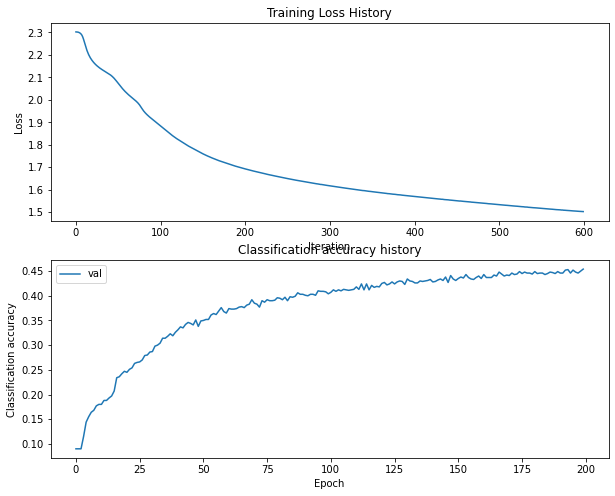

In [81]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)

# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()


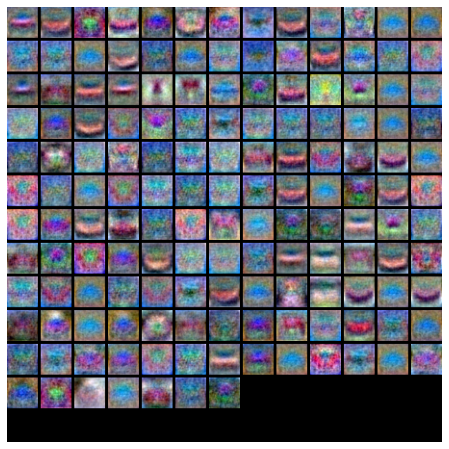

In [82]:
# TODO: visualize the weights of the best network (5%)
from utils.vis_utils import visualize_grid
# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [86]:
test_acc = (net.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.480054


**Inline Question** (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1. Train on a larger dataset and 3. Increase the regularization strength

$\color{blue}{\textit Your Explanation:}$ Training on a larger dataset would give the network more training examples to learn from while increasing data diversity and hence the model has a better chance to generalize. Increasing the regularization strength is very important because from the model above, the traininga accuracy was much higher than the validatation and even test accuracy. This is signaling overfitting and the task of regularization is to prevent overfitting by forcing the model to keep the weights as small as posible, allowing for better generalization and hence reducing the gap between training and test accuracy. 